# Case Study: Titanic Survival Prediction

## Objective

The aim of this case study is to build a model that predicts whether a passenger survived the Titanic disaster using different passenger details. You’ll apply machine learning methods such as the Perceptron and Multi-Layer Perceptron (MLP), and use concepts like backpropagation and gradient descent, to practice turning these techniques into a working solution on real-world data.

## Dataset Overview

The Titanic dataset serves as a valuable resource for exploring the survival patterns of passengers aboard the ill-fated Titanic.

**Features**
- PassengerId: A unique identifier for each passenger, used for tracking purposes.
- Survived: A binary variable indicating whether the passenger survived (0 = No, 1 = Yes).
- Pclass: The class of the ticket purchased, indicating the socioeconomic status of passengers (1st class, 2nd class, 3rd class).
- Name: The name of the passenger, which can provide insights into social status and family connections.
- Sex: The gender of the passenger, a critical factor influencing survival chances during the disaster.
- Age: The age of the passenger, as survival may vary significantly across different age groups.
- SibSp: The number of siblings or spouses aboard the Titanic, indicating potential family dynamics during the evacuation.
- Parch: The number of parents or children aboard, which can also reflect familial relationships and social support.
- Ticket: The ticket number assigned to the passenger, which may provide insights into purchasing patterns.
- Fare: The amount paid for the ticket, often correlating with social class and access to resources.
- Cabin: The cabin number, although many values are missing, it may hold information on the passenger's location on the ship.
- Embarked: The port where the passenger boarded (C = Cherbourg, Q = Queenstown, S = Southampton), potentially reflecting travel patterns and choices.

**Target Variable**
- Survived: This is the primary outcome we aim to predict, indicating whether the passenger survived (0 = No, 1 = Yes).

## Preprocessing

Data preprocessing is crucial to prepare the Titanic dataset for analysis. The following steps will be undertaken to ensure the data is clean and ready for modeling.

### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


### Step 2: Load the Dataset

In [2]:
# Load the Titanic dataset
data = pd.read_csv('./data/Titanic-Dataset.csv')  # Ensure the dataset is in the same directory or provide the full path
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 3: Handling Missing Values

Since missing values can disrupt model training, we need to handle them before proceeding. We’ll use SimpleImputer to fill missing values in both numerical and categorical columns.

In [3]:
# Handle missing values
# Create imputers: median for numbers, most frequent for categories
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Separate numerical and categorical columns
X_num = data.select_dtypes(include=['float64', 'int64'])  # Numerical features
X_cat = data[['Sex', 'Embarked']]  # Categorical features

# Apply imputation
# Fill missing values and restore original column names
X_num_imputed = pd.DataFrame(num_imputer.fit_transform(X_num), columns=X_num.columns)
X_cat_imputed = pd.DataFrame(cat_imputer.fit_transform(X_cat), columns=X_cat.columns)

# Combine back i.e Merge processed numeric & categorical data
df = pd.concat([X_num_imputed, X_cat_imputed], axis=1)

# Verify no missing values remain
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex            0
Embarked       0
dtype: int64


In [4]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,male,S
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,female,C
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,female,S
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,female,S
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,male,S
...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.0,0.0,0.0,13.0000,male,S
887,888.0,1.0,1.0,19.0,0.0,0.0,30.0000,female,S
888,889.0,0.0,3.0,28.0,1.0,2.0,23.4500,female,S
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,male,C


### Step 4: Encoding Categorical Variables

Convert categorical data like gender and embarkation port into numerical form using LabelEncoder.

In [5]:
# Initialize label encoder to convert categorical values into numeric codes
le = LabelEncoder()

# Encode 'Sex' column: convert to string (to handle missing/mixed types), 
# then map each unique category to an integer
df['Sex'] = le.fit_transform(df['Sex'].astype(str))  # Ensure 'Sex' column is in string format before encoding
df['Embarked'] = le.fit_transform(df['Embarked'].astype(str))  # Ensure 'Embarked' column is in string format

In [6]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1,2
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0,0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0,2
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0,2
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1,2
...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.0,0.0,0.0,13.0000,1,2
887,888.0,1.0,1.0,19.0,0.0,0.0,30.0000,0,2
888,889.0,0.0,3.0,28.0,1.0,2.0,23.4500,0,2
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,1,0


### Step 5: Splitting the Dataset

**Feature Dropping in ML**

1. **Drop Target** - e.g., `Survived`.
2. **Remove IDs** - unique per row (`Name`, `Ticket`).
3. **Too Many NaNs** - >70–80%.
4. **Prevent Leakage**  no future info.

In [7]:
# Define features and target variable
# Remove 'Survived' (target) and non-informative columns ('Name', 'Ticket') from features
# But since 'Name', ''Cabin' and 'Ticket' are already removed in step 3 so no need to drop 'Name' and 'Ticket'
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the dataset into training (80%)  and testing sets (20%) 
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1.0,3.0,22.0,1.0,0.0,7.2500,1,2
1,2.0,1.0,38.0,1.0,0.0,71.2833,0,0
2,3.0,3.0,26.0,0.0,0.0,7.9250,0,2
3,4.0,1.0,35.0,1.0,0.0,53.1000,0,2
4,5.0,3.0,35.0,0.0,0.0,8.0500,1,2
...,...,...,...,...,...,...,...,...
886,887.0,2.0,27.0,0.0,0.0,13.0000,1,2
887,888.0,1.0,19.0,0.0,0.0,30.0000,0,2
888,889.0,3.0,28.0,1.0,2.0,23.4500,0,2
889,890.0,1.0,26.0,0.0,0.0,30.0000,1,0


### Step 6: Normalization/Scaling

MLP models are sensitive to the scale of input data, so we’ll standardize the features using StandardScaler.

In [9]:
# Create a StandardScaler object to normalize features
# This will ensure each feature has mean = 0 and standard deviation = 1
scaler = StandardScaler()

# Fit the scaler on training data (calculate mean & std) 
# and scale the training set using those values
X_train['Fare'] = scaler.fit_transform(X_train[['Fare']])

# Scale the test set using the same mean & std from the training set 
# (important to prevent data leakage)
X_test['Fare'] = scaler.transform(X_test[['Fare']])


In [10]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
331,332.0,1.0,45.5,0.0,0.0,-0.078684,1,2
733,734.0,2.0,23.0,0.0,0.0,-0.377145,1,2
382,383.0,3.0,32.0,0.0,0.0,-0.474867,1,2
704,705.0,3.0,26.0,1.0,0.0,-0.476230,1,2
813,814.0,3.0,6.0,4.0,2.0,-0.025249,0,2
...,...,...,...,...,...,...,...,...
106,107.0,3.0,21.0,0.0,0.0,-0.480162,0,2
270,271.0,1.0,28.0,0.0,0.0,-0.030545,1,2
860,861.0,3.0,41.0,2.0,0.0,-0.355804,1,2
435,436.0,1.0,14.0,1.0,2.0,1.683201,0,2


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis is a vital step in understanding the dataset's characteristics and relationships between features.

### Step 1: Visualizing Feature Distributions

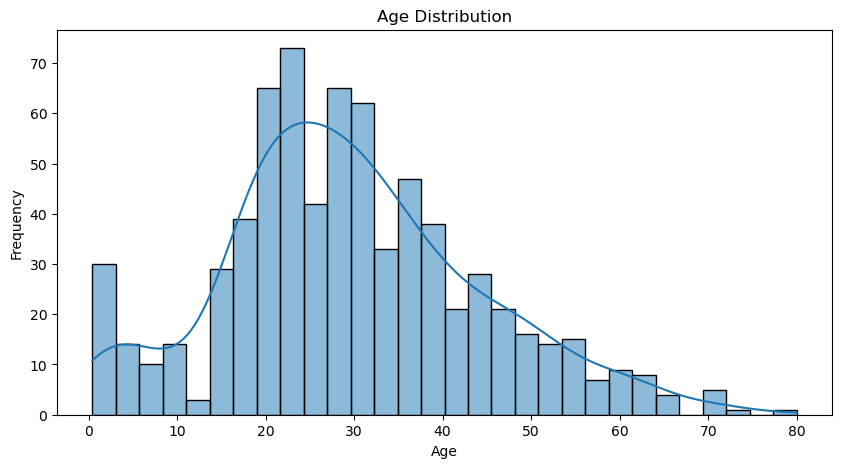

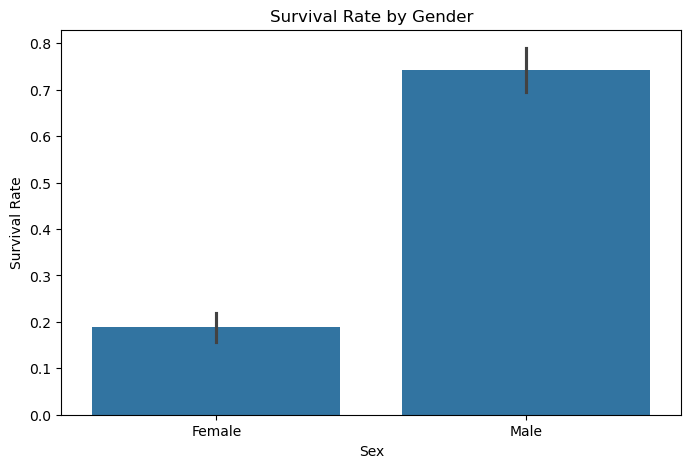

In [11]:
# Histogram for Age
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot for survival rates by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()


### Step 2: Analyzing Survival Rates

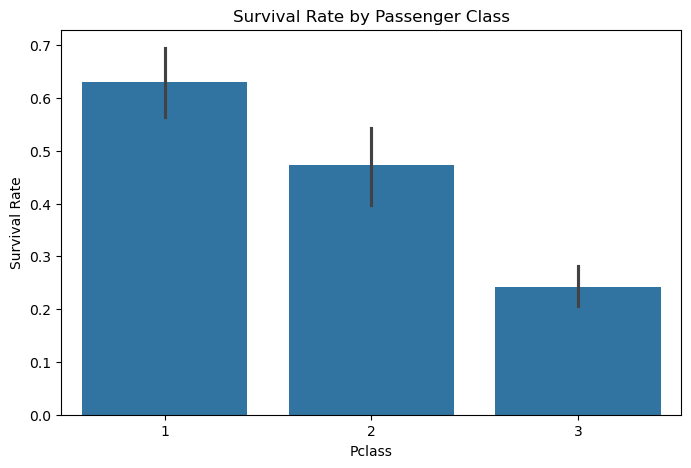

In [12]:
# Bar plot for survival rates by passenger class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

### Step 3: Correlation Matrix

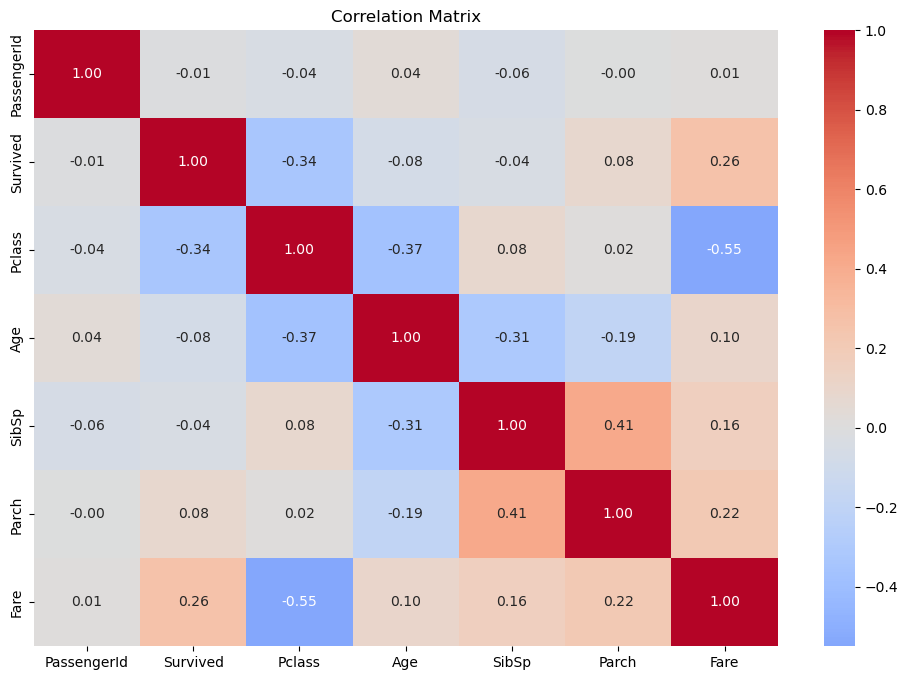

In [13]:
# Correlation matrix
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Model Building

### Step 1: Initialize the MLP Model


We initialize an MLP model with two hidden layers of 10 neurons each and set the maximum iterations to 1000.

In [14]:
# Initialize the model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)


### Step 2: Train the Model

We fit the MLP model using the training data.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer

# Assuming X_train is your DataFrame with categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns  # Identify categorical columns
numerical_features = X_train.select_dtypes(exclude=['object']).columns # Identify numerical features

# Create a ColumnTransformer to apply OneHotEncoding to categorical features
# and passthrough for numerical features. Impute missing values using SimpleImputer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')), # Impute missing numerical values with the mean
            ('scaler', StandardScaler()) # Scale numerical data after imputation - optional
            ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with most frequent
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
            ]), categorical_features)
    ])

# Create a pipeline with the preprocessor and the MLPClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)),
])

# Before fitting the pipeline, remove or impute NaN values in BOTH X_train and y_train

# Option 1: Remove rows with NaN in either X_train or y_train
# rows_with_nan = X_train.isna().any(axis=1) | y_train.isna() # Find rows with NaN in X_train or y_train
# X_train = X_train[~rows_with_nan] # Select rows without NaN
# y_train = y_train[~rows_with_nan]

# Option 2: Impute NaN values in X_train and y_train
# Imputation for X_train is already handled by the preprocessor

# Impute NaN values in y_train (e.g., with the most frequent value)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') # or strategy='constant', fill_value=your_value
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1))  # Reshape to a 2D array for SimpleImputer
y_train = y_train.ravel() # Flatten back to a 1D array


# Choose either Option 1 or Option 2 and then fit the pipeline
pipeline.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex',
       'Embarked'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000,
                               random_state=42))])

### Step 3: Predictions

Make predictions using the test set.

In [16]:
# Predictions
y_pred = pipeline.predict(X_test)


## Evaluation

Evaluate the performance of the model using accuracy and other metrics.



##### Model Evaluation

In [17]:
# Find indices of rows with NaN values in y_test
nan_indices = np.isnan(y_test)

# Remove rows with NaN values from y_test and X_test
y_test = y_test[~nan_indices]
X_test = X_test[~nan_indices]

# Predictions
y_pred = pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Final Model Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       105
         1.0       0.84      0.76      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
[[94 11]
 [18 56]]
